### Importy

In [101]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Inicjalizacja środowiska

In [3]:
env = gym.make("CartPole-v1")

## 2. Utworzenie agenta RL

In [85]:
class QLearningAgent:
    def __init__(self, observation_space, action_space):
        self.action_space = action_space
        self.q_table = np.zeros((observation_space, action_space))

    def choose_action(self, state, epsilon):
        if np.random.uniform(0, 1) < epsilon:
            return np.random.choice(self.action_space)
        else:
            return np.argmax(self.q_table[np.argmax(state[0]), :])

    def update_q_table(
        self, state, action, reward, next_state, learning_rate, discount_factor
    ):
        max_next_q = np.max(self.q_table[next_state, action])
        current_q = self.q_table[state, action]

        self.q_table[state, action] += learning_rate * (
            reward + discount_factor * max_next_q - current_q
        )

In [86]:
agent = QLearningAgent(env.observation_space.shape[0], env.action_space.n)

### 3. Pętla treningowa

In [105]:
def train(
    agent, env, episodes, epsilon_start=1.0, epsilon_min=0.01, epsilon_decay=0.995
):
    episodes_plt = []
    rewards = []
    r = []
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        epsilon = max(epsilon_start * (epsilon_decay**episode), epsilon_min)

        while not done:
            action = agent.choose_action(state, epsilon)
            next_state, reward, terminated, truncated, _ = env.step(action)
            agent.update_q_table(
                np.argmax(state[0]),
                action,
                reward,
                np.argmax(next_state[0]),
                learning_rate=0.1,
                discount_factor=0.99,
            )
            state = next_state
            total_reward += reward
            done = terminated or truncated

        print(f"Episode {episode + 1}, Total Reward: {total_reward}, {reward}")
        rewards.append(total_reward)
        episodes_plt.append(episode + 1)
        r.append(reward)

    return episodes_plt, rewards, r


agent = QLearningAgent(env.observation_space.shape[0], env.action_space.n)
episodes, rewards, r = train(agent, env, episodes=1000)

Episode 1, Total Reward: 12.0, 1.0
Episode 2, Total Reward: 25.0, 1.0
Episode 3, Total Reward: 13.0, 1.0
Episode 4, Total Reward: 20.0, 1.0
Episode 5, Total Reward: 12.0, 1.0
Episode 6, Total Reward: 14.0, 1.0
Episode 7, Total Reward: 12.0, 1.0
Episode 8, Total Reward: 13.0, 1.0
Episode 9, Total Reward: 34.0, 1.0
Episode 10, Total Reward: 16.0, 1.0
Episode 11, Total Reward: 25.0, 1.0
Episode 12, Total Reward: 12.0, 1.0
Episode 13, Total Reward: 14.0, 1.0
Episode 14, Total Reward: 42.0, 1.0
Episode 15, Total Reward: 46.0, 1.0
Episode 16, Total Reward: 42.0, 1.0
Episode 17, Total Reward: 34.0, 1.0
Episode 18, Total Reward: 15.0, 1.0
Episode 19, Total Reward: 9.0, 1.0
Episode 20, Total Reward: 18.0, 1.0
Episode 21, Total Reward: 16.0, 1.0
Episode 22, Total Reward: 13.0, 1.0
Episode 23, Total Reward: 13.0, 1.0
Episode 24, Total Reward: 19.0, 1.0
Episode 25, Total Reward: 17.0, 1.0
Episode 26, Total Reward: 14.0, 1.0
Episode 27, Total Reward: 10.0, 1.0
Episode 28, Total Reward: 11.0, 1.0
Ep

### 4. Wizualizacja treningu

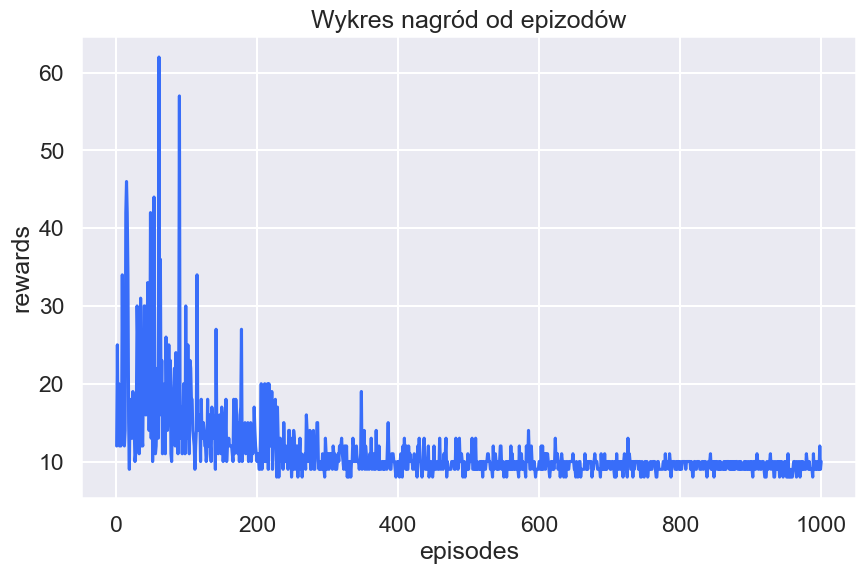

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.set(style="darkgrid", context="talk", palette="rainbow")
sns.lineplot(x=episodes, y=rewards)
ax.set(title="Wykres nagród od epizodów", ylabel="rewards", xlabel="episodes")

plt.show()